In [16]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point

In [2]:
df = pd.read_csv("C:/Users/kromi/OneDrive/Bellevue/Applied Data Science/Weeks 9-12/EJ Data.csv")

In [5]:
df.columns

Index(['Facility Name', 'Facility ID', 'Year', 'Latitude', 'Longitude',
       'GeoID', 'SO2 Mass (short tons)', 'NOx Mass (short tons)',
       'CO2 Mass (short tons)', 'Heat Input (mmBtu)', 'Gross Load (MWh)',
       'PM25', 'Ozone', 'Low Income (pct)', 'Minority Pop (pct)', 'State'],
      dtype='object')

# EDA

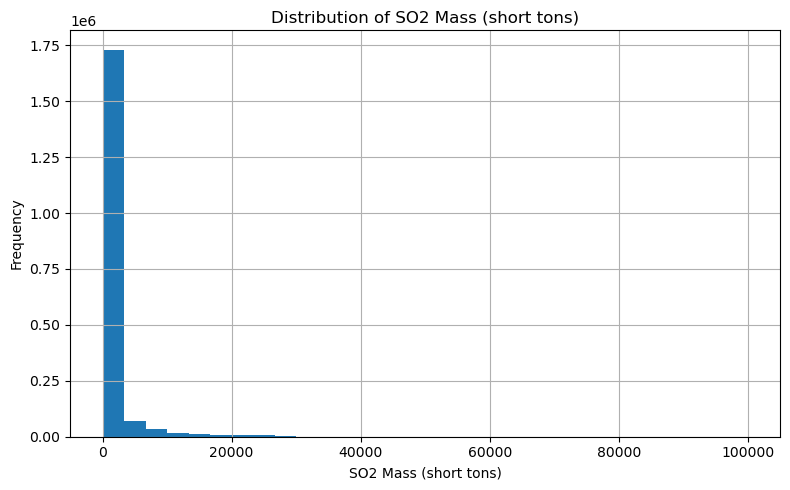

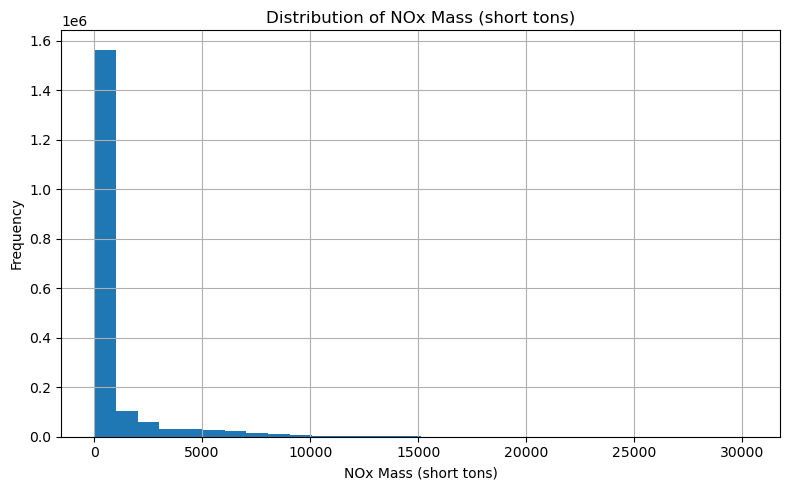

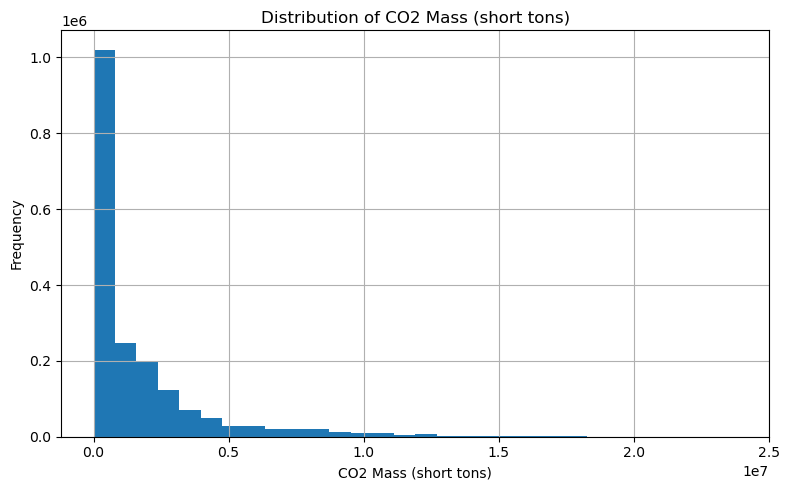

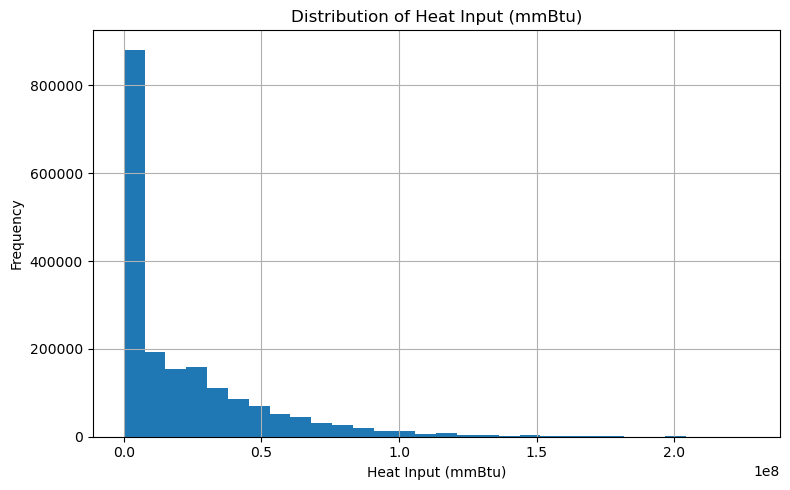

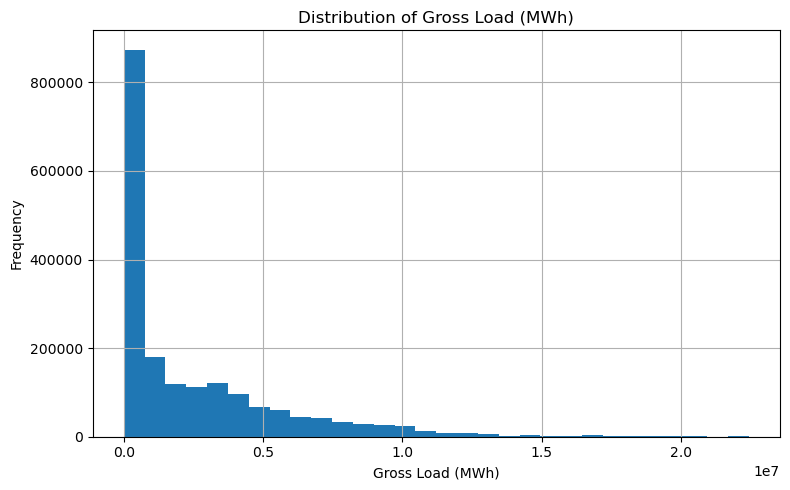

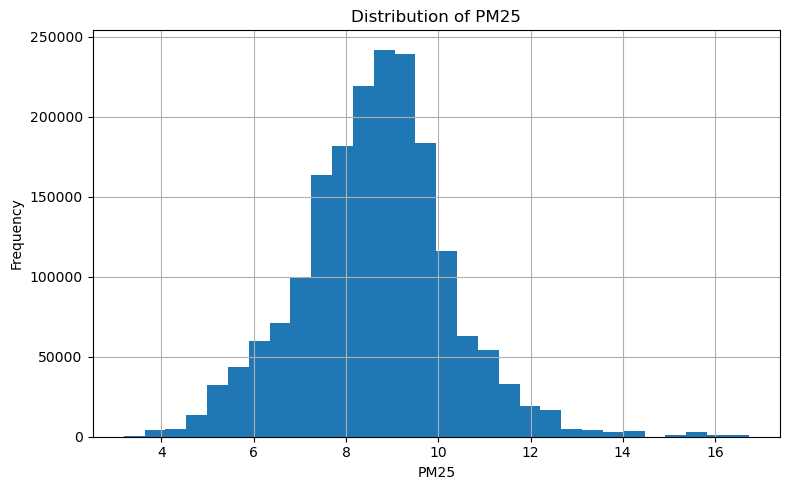

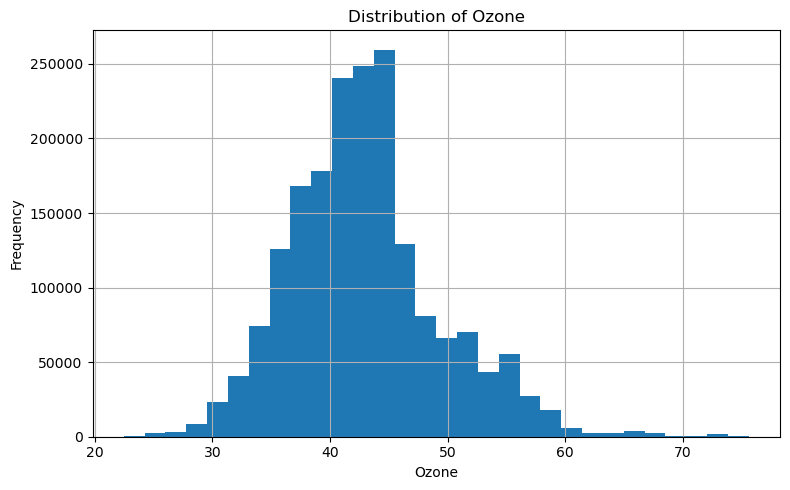

In [7]:
#Defining numeric columns to plot.
hist_cols = ['SO2 Mass (short tons)', 'NOx Mass (short tons)', 'CO2 Mass (short tons)', 'Heat Input (mmBtu)', 'Gross Load (MWh)', 'PM25', 'Ozone']

# Plot histograms
for col in hist_cols:
    plt.figure(figsize=(8, 5))
    df[col].hist(bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

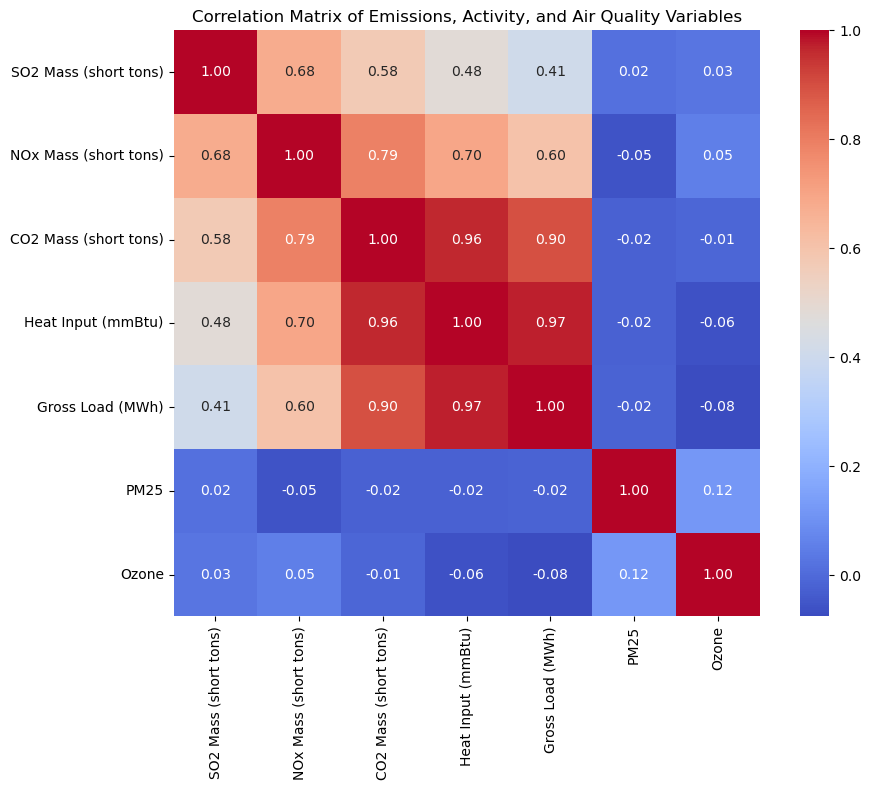

In [9]:
#Defining columns to include in correlation analysis.
corr_cols = ['SO2 Mass (short tons)', 'NOx Mass (short tons)', 'CO2 Mass (short tons)', 'Heat Input (mmBtu)', 'Gross Load (MWh)', 'PM25', 'Ozone']

# Subset DataFrame
corr_df = df[corr_cols]

# Compute and plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_df.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Matrix of Emissions, Activity, and Air Quality Variables")
plt.tight_layout()
plt.show()

# Equity-Emissions Overlay
## Mapping Overburdened Communities

In [13]:
# Define path and layer
gdb_path = "C:/Users/kromi/OneDrive/Bellevue/Applied Data Science/Weeks 9-12/EJScreen Data/EJScreen_2024_BG_StatePct_with_AS_CNMI_GU_VI.gdb"
layer_name = "EJSCREEN_StatePct_with_AS_CNMI_GU_VI"

# Read the layer
gdf = gpd.read_file(gdb_path, layer=layer_name)

# Optional: check columns
print(gdf.columns.tolist())

['ID', 'STATE_NAME', 'ST_ABBREV', 'CNTY_NAME', 'REGION', 'ACSTOTPOP', 'ACSIPOVBAS', 'ACSEDUCBAS', 'ACSTOTHH', 'ACSTOTHU', 'ACSUNEMPBAS', 'ACSDISABBAS', 'DEMOGIDX_2', 'DEMOGIDX_5', 'PEOPCOLOR', 'PEOPCOLORPCT', 'LOWINCOME', 'LOWINCPCT', 'UNEMPLOYED', 'UNEMPPCT', 'DISABILITY', 'DISABILITYPCT', 'LINGISO', 'LINGISOPCT', 'LESSHS', 'LESSHSPCT', 'UNDER5', 'UNDER5PCT', 'OVER64', 'OVER64PCT', 'LIFEEXPPCT', 'PM25', 'OZONE', 'DSLPM', 'RSEI_AIR', 'PTRAF', 'PRE1960', 'PRE1960PCT', 'PNPL', 'PRMP', 'PTSDF', 'UST', 'PWDIS', 'NO2', 'DWATER', 'D2_PM25', 'D5_PM25', 'D2_OZONE', 'D5_OZONE', 'D2_DSLPM', 'D5_DSLPM', 'D2_RSEI_AIR', 'D5_RSEI_AIR', 'D2_PTRAF', 'D5_PTRAF', 'D2_LDPNT', 'D5_LDPNT', 'D2_PNPL', 'D5_PNPL', 'D2_PRMP', 'D5_PRMP', 'D2_PTSDF', 'D5_PTSDF', 'D2_UST', 'D5_UST', 'D2_PWDIS', 'D5_PWDIS', 'D2_NO2', 'D5_NO2', 'D2_DWATER', 'D5_DWATER', 'P_DEMOGIDX_2', 'P_DEMOGIDX_5', 'P_PEOPCOLORPCT', 'P_LOWINCPCT', 'P_UNEMPPCT', 'P_DISABILITYPCT', 'P_LINGISOPCT', 'P_LESSHSPCT', 'P_UNDER5PCT', 'P_OVER64PCT', 'P_LI

In [18]:
# Assuming df is your cleaned emissions DataFrame and it has 'Latitude' and 'Longitude' columns
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
facilities = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")

In [ ]:
"C:/Users/kromi/OneDrive/Bellevue/Applied Data Science/Weeks 9-12/cb_2023_us_state_20m.shp"

C:\Users\kromi\anaconda3\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\kromi\AppData\Local\Temp\ipykernel_11760\4271853782.py:34: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
C:\Users\kromi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


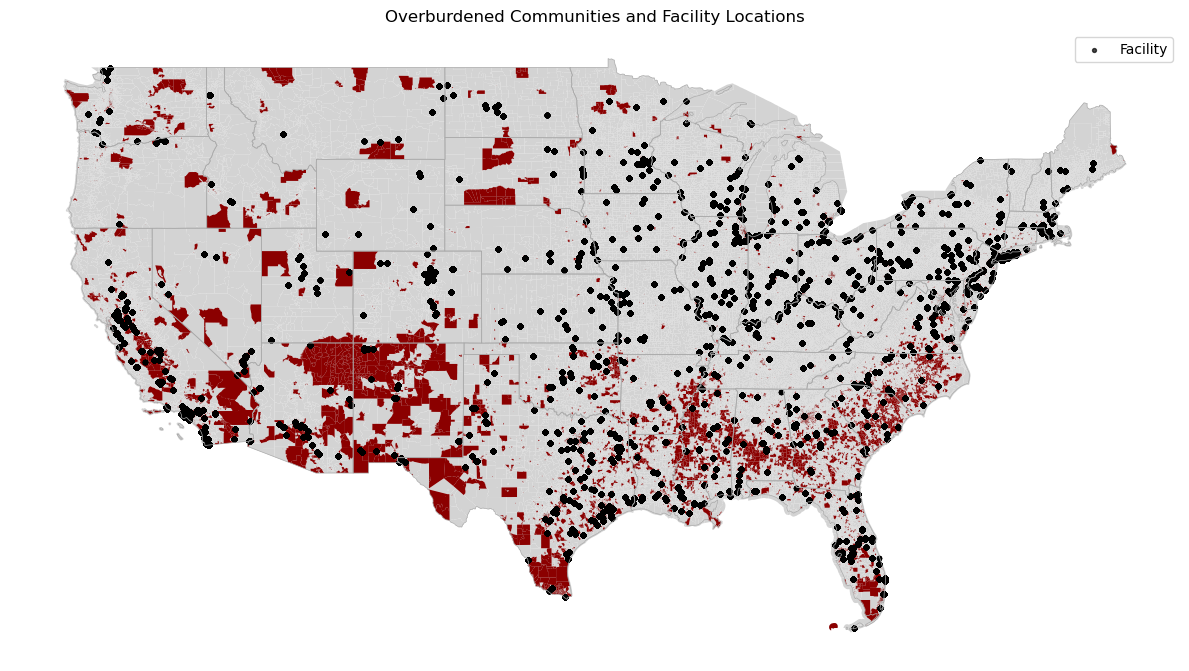

In [22]:
# Define bounding box for continental US
conus_bounds = {
    'minx': -125,
    'maxx': -66,
    'miny': 24,
    'maxy': 50
}

# Filter to CONUS for EJSCREEN and facility points
gdf_conus = gdf.cx[conus_bounds['minx']:conus_bounds['maxx'], conus_bounds['miny']:conus_bounds['maxy']]
facilities_conus = facilities.cx[conus_bounds['minx']:conus_bounds['maxx'], conus_bounds['miny']:conus_bounds['maxy']]

gdf_conus.loc[:,'Overburdened'] = (
    (gdf_conus['PEOPCOLORPCT'] >= .4) &
    (gdf_conus['LOWINCPCT'] >= .35)
)

# Optional: load state boundaries for outline
states = gpd.read_file("C:/Users/kromi/OneDrive/Bellevue/Applied Data Science/Weeks 9-12/cb_2023_us_state_20m.shp")
states_conus = states.cx[conus_bounds['minx']:conus_bounds['maxx'], conus_bounds['miny']:conus_bounds['maxy']]

# Plot
fig, ax = plt.subplots(figsize=(12, 8))
gdf_conus.plot(ax=ax, color='lightgray', edgecolor='none')

if not gdf_conus[gdf_conus['Overburdened']].empty:
    gdf_conus[gdf_conus['Overburdened']].plot(ax=ax, color='darkred', label='Overburdened Areas')

facilities_conus.plot(ax=ax, color='black', markersize=8, label='Facility', alpha=0.7)
states_conus.boundary.plot(ax=ax, color='darkgray', linewidth=0.5)

plt.title('Overburdened Communities and Facility Locations')
plt.axis('off')
plt.legend()
plt.tight_layout()
plt.show()

## Facility Ranking Table

In [26]:
# Calculate total emissions
df['Total_Emissions'] = df['SO2 Mass (short tons)'] + df['NOx Mass (short tons)'] + df['CO2 Mass (short tons)']

# Create a ranking DataFrame
ranking = df[['Facility Name', 'Facility ID', 'State', 'Total_Emissions', 'Year']].sort_values(by='Total_Emissions', ascending=False)

ranking = ranking.drop_duplicates()

# Display it
ranking.head(10)

,Facility Name,Facility ID,State,Total_Emissions,Year
747330,James H Miller Jr,6002,AL,2.382358e+07,2022
747180,James H Miller Jr,6002,AL,2.297395e+07,2021
746079,James H Miller Jr,6002,AL,2.275437e+07,2017
745835,James H Miller Jr,6002,AL,2.158905e+07,2016
745651,James H Miller Jr,6002,AL,2.105907e+07,2015
746599,James H Miller Jr,6002,AL,2.097292e+07,2019
747787,James H Miller Jr,6002,AL,2.080505e+07,2024
746325,James H Miller Jr,6002,AL,2.016307e+07,2018
837799,Scherer,6257,GA,1.969172e+07,2015
837805,Scherer,6257,GA,1.932551e+07,2016


C:\Users\kromi\anaconda3\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


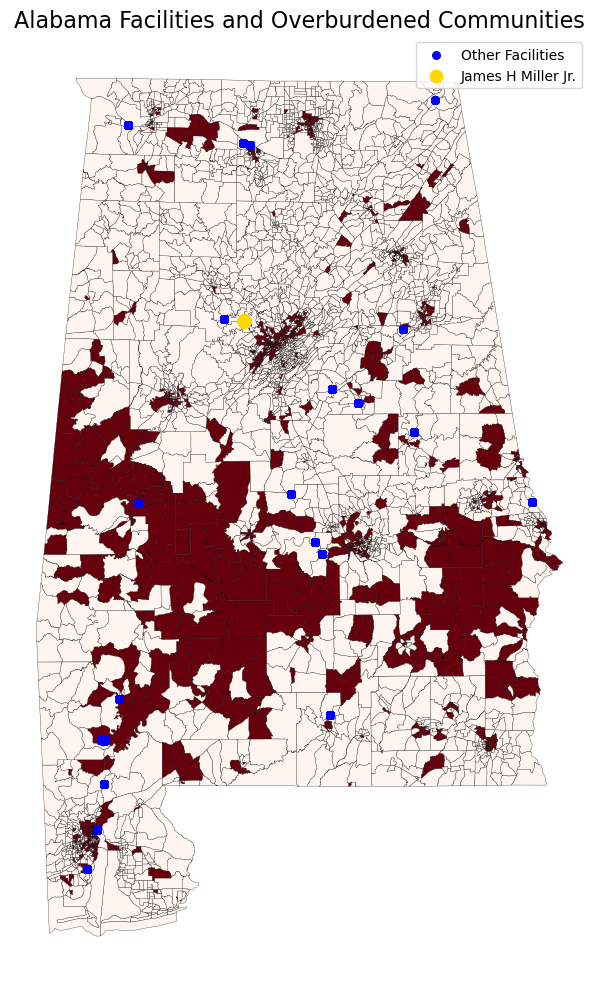

In [46]:
# 1. Filter to Alabama (you can use state name or abbreviation)
alabama_gdf = gdf_conus[gdf_conus['STATE_NAME'] == 'Alabama']
alabama_facilities = facilities_conus[facilities_conus['State'] == 'AL']

# 2. Flag the James H Miller Jr facility
alabama_facilities['Is_Miller'] = alabama_facilities['Facility Name'].str.contains("Miller", case=False, na=False)

# 3. Plot
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))

# Plot Alabama census tracts with Overburdened shading
alabama_gdf.plot(ax=ax, column='Overburdened', cmap='Reds', legend=True, edgecolor='black', linewidth=0.2)

# Plot other facilities in blue
alabama_facilities[~alabama_facilities['Is_Miller']].plot(
    ax=ax, color='blue', markersize=30, label='Other Facilities'
)

# Plot Miller facility in gold
alabama_facilities[alabama_facilities['Is_Miller']].plot(
    ax=ax, color='gold', markersize=80, label='James H Miller Jr.'
)

# Title and formatting
ax.set_title('Alabama Facilities and Overburdened Communities', fontsize=16)
ax.legend()
ax.axis('off')
plt.tight_layout()
plt.show()

# Random Forest Regressor
## PM2.5

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [40]:
# Add EJ variables
features = [
    'SO2 Mass (short tons)', 'NOx Mass (short tons)', 'CO2 Mass (short tons)', 'Low Income (pct)', 'Minority Pop (pct)']
target = 'PM25'

X = df[features]
y = df[target]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("R²:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

R²: 0.9940804086355793
RMSE: 0.12622612617708936


C:\Users\kromi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


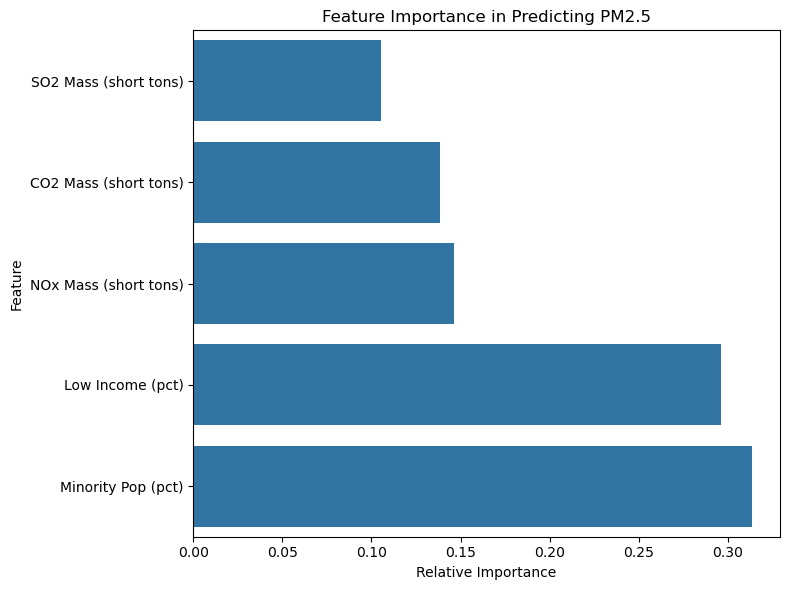

In [41]:
# Get feature importances
importances = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort for better visualization
importance_df = importance_df.sort_values(by='Importance', ascending=True)

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance in Predicting PM2.5')
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


## Ozone

In [44]:
# Add EJ variables
features = [
    'SO2 Mass (short tons)', 'NOx Mass (short tons)', 'CO2 Mass (short tons)', 'Low Income (pct)', 'Minority Pop (pct)']
target = 'Ozone'

X = df[features]
y = df[target]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("R²:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

R²: 0.9903567662921168
RMSE: 0.6300679250888552


C:\Users\kromi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


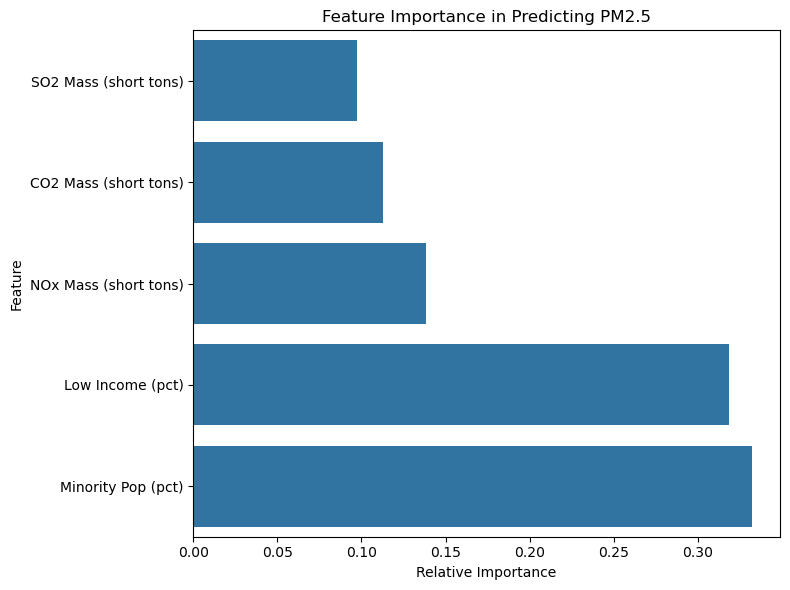

In [45]:
# Get feature importances
importances = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort for better visualization
importance_df = importance_df.sort_values(by='Importance', ascending=True)

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance in Predicting PM2.5')
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()